In [ ]:
import pandas as pd
data = pd.read_csv('train_modified.csv')
print(data)

      id  Gender        Age    Height      Weight  \
0      0    Male  24.443011  1.699998   81.669950   
1      1  Female  18.000000  1.560000   57.000000   
2      2  Female  18.000000  1.711460   50.165754   
3      3  Female  20.952737  1.710730  131.274851   
4      4    Male  31.641081  1.914186   93.798055   
...   ..     ...        ...       ...         ...   
5000  11    Male  22.000000  1.700000   70.000000   
5001  13  Female  21.412538  1.729045  131.529267   
5002  14  Female  20.000000  1.570000   49.000000   
5003  16  Female  34.000000  1.700000   80.000000   
5004  17  Female  18.000000  1.560000   50.000000   

     family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                               yes  yes  2.000000  2.983297   Sometimes   
1                               yes  yes  2.000000  3.000000  Frequently   
2                               yes  yes  1.880534  1.411685   Sometimes   
3                               yes  yes  3.000000  3.00000

Renaming Columns

In [ ]:
data = data.rename(columns = {'FAVC' : 'frequent_consumption_of_high_caloric_food', 'FCVC' : 'frequency_of_consumption_of_vegetables', 'NCP' : 'number_of_main_meals', 'CAEC' : 'consumption_of_food_between_meals', 'CH2O' : 'consumption_of_water_daily', 'CALC' : 'consumption_of_alcohol', 'SCC' : 'calories_consumption_monitoring', 'FAF' : 'physical_activity_frequency', 'TUE' : 'time_using_technology_devices', 'MTRANS' : 'transportation_used', 'NObeyesdad' : 'obesity_level'})
print(data)

      id  Gender        Age    Height      Weight  \
0      0    Male  24.443011  1.699998   81.669950   
1      1  Female  18.000000  1.560000   57.000000   
2      2  Female  18.000000  1.711460   50.165754   
3      3  Female  20.952737  1.710730  131.274851   
4      4    Male  31.641081  1.914186   93.798055   
...   ..     ...        ...       ...         ...   
5000  11    Male  22.000000  1.700000   70.000000   
5001  13  Female  21.412538  1.729045  131.529267   
5002  14  Female  20.000000  1.570000   49.000000   
5003  16  Female  34.000000  1.700000   80.000000   
5004  17  Female  18.000000  1.560000   50.000000   

     family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                               yes                                       yes   
1                               yes                                       yes   
2                               yes                                       yes   
3                               yes    

Finding and REmoving duplicate data

In [ ]:
dup_data = data.duplicated()
duplicates = data[dup_data]
print(duplicates)

      id  Gender        Age    Height      Weight  \
4999  10  Female  20.000000  1.650000   65.000000   
5000  11    Male  22.000000  1.700000   70.000000   
5001  13  Female  21.412538  1.729045  131.529267   
5002  14  Female  20.000000  1.570000   49.000000   
5003  16  Female  34.000000  1.700000   80.000000   
5004  17  Female  18.000000  1.560000   50.000000   

     family_history_with_overweight frequent_consumption_of_high_caloric_food  \
4999                            yes                                       yes   
5000                            yes                                        no   
5001                            yes                                       yes   
5002                             no                                        no   
5003                            yes                                        no   
5004                             no                                       yes   

      frequency_of_consumption_of_vegetables  number_of_main

In [ ]:
data = data.drop_duplicates()
print(data)

        id  Gender        Age    Height      Weight  \
0        0    Male  24.443011  1.699998   81.669950   
1        1  Female  18.000000  1.560000   57.000000   
2        2  Female  18.000000  1.711460   50.165754   
3        3  Female  20.952737  1.710730  131.274851   
4        4    Male  31.641081  1.914186   93.798055   
...    ...     ...        ...       ...         ...   
4994  4994    Male  19.684891  1.838441   85.312639   
4995  4995    Male  16.000000  1.700000   71.000000   
4996  4996    Male  19.000000  1.800000   85.000000   
4997  4997    Male  19.946244  1.603435   45.000000   
4998  4998  Female  20.519916  1.716497  129.013178   

     family_history_with_overweight frequent_consumption_of_high_caloric_food  \
0                               yes                                       yes   
1                               yes                                       yes   
2                               yes                                       yes   
3              

Filling missing values

In [ ]:
print(data.isnull().sum())

id                                           0
Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
family_history_with_overweight               0
frequent_consumption_of_high_caloric_food    0
frequency_of_consumption_of_vegetables       1
number_of_main_meals                         0
consumption_of_food_between_meals            0
SMOKE                                        0
consumption_of_water_daily                   0
calories_consumption_monitoring              0
physical_activity_frequency                  0
time_using_technology_devices                0
consumption_of_alcohol                       0
transportation_used                          0
obesity_level                                0
dtype: int64


Data is null only in frequency_of_consumption_of_vegetables. As it is frequency, we use mode to fill that missing data.

In [ ]:
data['frequency_of_consumption_of_vegetables']=data['frequency_of_consumption_of_vegetables'].fillna(data['frequency_of_consumption_of_vegetables'].mean())

In [ ]:
print(data.isnull().sum())

id                                           0
Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
family_history_with_overweight               0
frequent_consumption_of_high_caloric_food    0
frequency_of_consumption_of_vegetables       0
number_of_main_meals                         0
consumption_of_food_between_meals            0
SMOKE                                        0
consumption_of_water_daily                   0
calories_consumption_monitoring              0
physical_activity_frequency                  0
time_using_technology_devices                0
consumption_of_alcohol                       0
transportation_used                          0
obesity_level                                0
dtype: int64


In [ ]:
mask = data.isna().any(axis = 1) | (data == " ").any(axis = 1)

if mask.any().any():
  print(data[mask])
else:
  print("No Empty Vals")

    id Gender        Age    Height      Weight family_history_with_overweight  \
15  15   Male  28.377958  1.706525  102.592171                                  

   frequent_consumption_of_high_caloric_food  \
15                                       yes   

    frequency_of_consumption_of_vegetables  number_of_main_meals  \
15                                2.636719                   3.0   

   consumption_of_food_between_meals SMOKE  consumption_of_water_daily  \
15                         Sometimes    no                         1.0   

   calories_consumption_monitoring  physical_activity_frequency  \
15                              no                     1.995582   

    time_using_technology_devices consumption_of_alcohol  \
15                       0.930836              Sometimes   

      transportation_used    obesity_level  
15  Public_Transportation  Obesity_Type_II  


In [ ]:
data.loc[15, 'family_history_with_overweight'] = data['family_history_with_overweight'].mode().iloc[0]


In [ ]:
mask = data.isna().any(axis = 1) | (data == " ").any(axis = 1)

if mask.any().any():
  print(data[mask])
else:
  print("No Empty Vals")

No Empty Vals


getting the csv file

In [ ]:
data.to_csv('clean_data.csv')

Task 2

In [ ]:
print(data.dtypes)

id                                             int64
Gender                                        object
Age                                          float64
Height                                       float64
Weight                                       float64
family_history_with_overweight                object
frequent_consumption_of_high_caloric_food     object
frequency_of_consumption_of_vegetables       float64
number_of_main_meals                         float64
consumption_of_food_between_meals             object
SMOKE                                         object
consumption_of_water_daily                   float64
calories_consumption_monitoring               object
physical_activity_frequency                  float64
time_using_technology_devices                float64
consumption_of_alcohol                        object
transportation_used                           object
obesity_level                                 object
dtype: object


In [ ]:
uniquedict = {}
for col in data:
  if (data[col].dtype) == object:
    uniquedict[col] = data[col].unique()

for i in uniquedict:
  print(f"{i}:{uniquedict[i]}")

Gender:['Male' 'Female']
family_history_with_overweight:['yes' 'no']
frequent_consumption_of_high_caloric_food:['yes' 'no']
consumption_of_food_between_meals:['Sometimes' 'Frequently' 'no' 'Always']
SMOKE:['no' 'yes']
calories_consumption_monitoring:['no' 'yes']
consumption_of_alcohol:['Sometimes' 'no' 'Frequently']
transportation_used:['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
obesity_level:['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [ ]:
for key in uniquedict:
  count = data[key].value_counts()
  print(count)
  print()

Gender
Female    2530
Male      2469
Name: count, dtype: int64

family_history_with_overweight
yes    4056
no      943
Name: count, dtype: int64

frequent_consumption_of_high_caloric_food
yes    4554
no      445
Name: count, dtype: int64

consumption_of_food_between_meals
Sometimes     4196
Frequently     631
Always         109
no              63
Name: count, dtype: int64

SMOKE
no     4952
yes      47
Name: count, dtype: int64

calories_consumption_monitoring
no     4809
yes     190
Name: count, dtype: int64

consumption_of_alcohol
Sometimes     3587
no            1269
Frequently     143
Name: count, dtype: int64

transportation_used
Public_Transportation    3977
Automobile                886
Walking                   113
Motorbike                  13
Bike                       10
Name: count, dtype: int64

obesity_level
Obesity_Type_III       948
Normal_Weight          798
Obesity_Type_II        723
Obesity_Type_I         701
Insufficient_Weight    633
Overweight_Level_II    615
Over

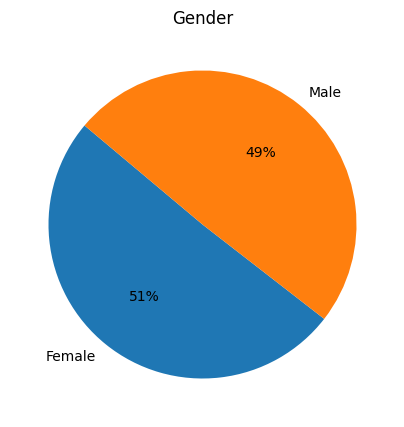

In [ ]:
import matplotlib.pyplot as plt
# For gender
count = data['Gender'].value_counts()
d = {}
for value, cnt in count.items():
  d[value] = cnt
keys = list(d.keys())
values = list(d.values())

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(values, labels=keys, autopct='%1.0f%%', startangle=140)

# Add a title
plt.title('Gender')

# Show the plot
plt.show()

Text(0, 0.5, 'usage')

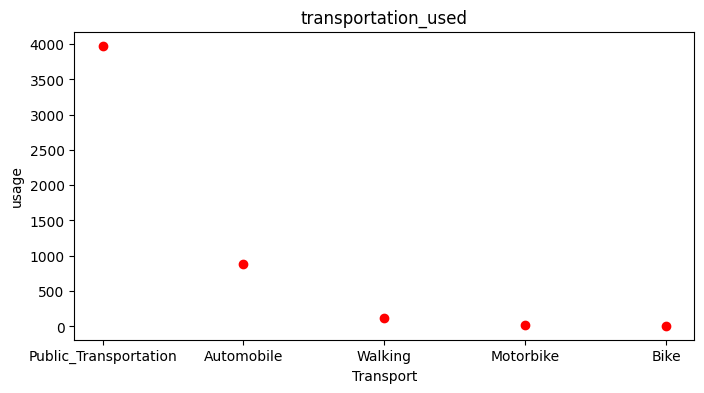

In [ ]:
import matplotlib.pyplot as plt
# For Physical activity frequency
count = data['transportation_used'].value_counts()
d = {}
for value, cnt in count.items():
  d[value] = cnt
keys = list(d.keys())
values = list(d.values())
plt.figure(figsize=(8, 4))
plt.scatter(keys, values, color='r')

plt.title('transportation_used')
plt.xlabel('Transport')
plt.ylabel('usage')

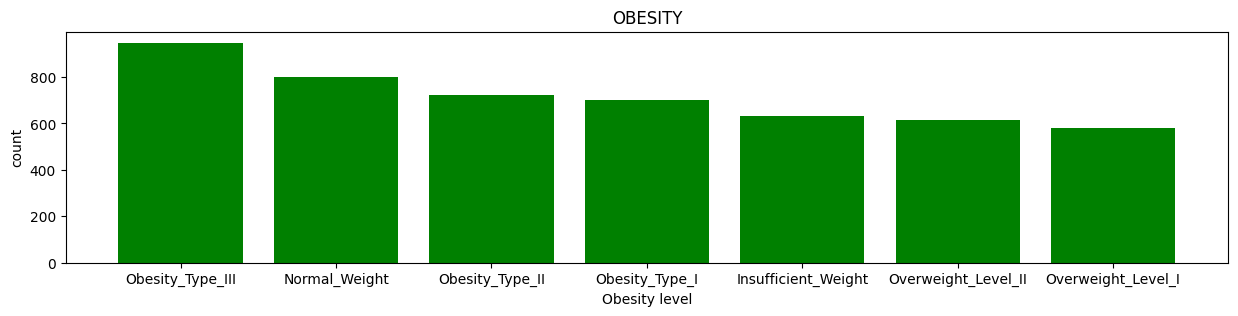

In [ ]:
import matplotlib.pyplot as plt
# For Physical activity frequency
count = data['obesity_level'].value_counts()
d = {}
for value, cnt in count.items():
  d[value] = cnt
keys = list(d.keys())
values = list(d.values())
plt.figure(figsize=(15, 3))
plt.bar(keys, values, color='g')

plt.title('OBESITY')
plt.xlabel('Obesity level')
plt.ylabel('count')

plt.show()

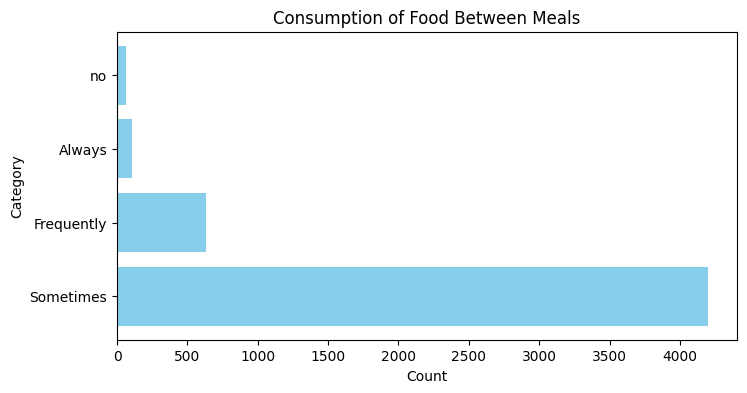

In [ ]:
import matplotlib.pyplot as plt
# For Physical activity frequency
count = data['consumption_of_food_between_meals'].value_counts()
d = {}
for value, cnt in count.items():
  d[value] = cnt
categories = list(d.keys())
counts = list(d.values())
plt.figure(figsize=(8, 4))
plt.barh(categories, counts, color='skyblue')

# Add titles and labels
plt.title('Consumption of Food Between Meals')
plt.xlabel('Count')
plt.ylabel('Category')

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

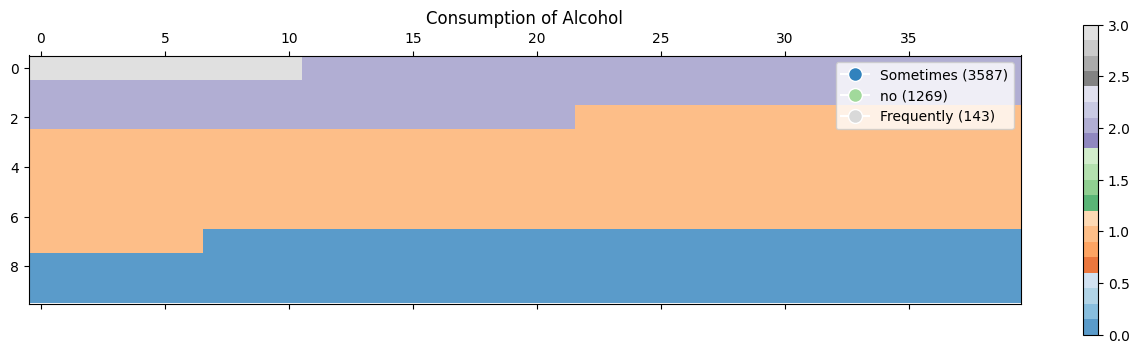

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Sometimes': 3587,
    'no': 1269,
    'Frequently': 143
}

# Total value
total_values = sum(data.values())

# Proportion of each category
proportions = {k: v / total_values for k, v in data.items()}

# Waffle chart settings
width = 40
height = 10
total_tiles = width * height

# Calculate the number of tiles for each category
tiles_per_category = {k: round(v * total_tiles) for k, v in proportions.items()}

# Create the waffle chart
waffle_chart = np.zeros((height, width), dtype=int)

category_index = 1
for category, tiles in tiles_per_category.items():
    tiles_to_fill = tiles
    for row in range(height):
        for col in range(width):
            if tiles_to_fill > 0:
                waffle_chart[row, col] = category_index
                tiles_to_fill -= 1
    category_index += 1

# Plotting the waffle chart
fig = plt.figure(figsize=(12, 6))
plt.matshow(waffle_chart, cmap='tab20c', alpha=0.8)
plt.colorbar()

# Adding legend
categories = list(data.keys())
values = list(data.values())
category_colors = plt.cm.tab20c(np.linspace(0, 1, len(categories)))

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=category_colors[i], markersize=10) for i in range(len(categories))]
plt.legend(handles=legend_handles, labels=[f"{category} ({value})" for category, value in zip(categories, values)], loc='best')

# Add title
plt.title('Consumption of Alcohol')

plt.show()
